In [72]:
from  tensorflow import keras
from  keras import datasets
from  keras.utils import to_categorical
from keras.layers import Input, Dense, Flatten
from matplotlib import pyplot as plt


In [73]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

In [74]:
# y_test1=y_test
# num_classes = 10
# y_train = to_categorical(y_train, num_classes)
# y_test = to_categorical(y_test, num_classes)
# print(y_test1[0])
# print(y_test[0])

In [75]:
#Normalize image pixel values.
x_train = x_train/255
x_test = x_test/255

In [76]:
model=keras.Sequential() #Create a network sequence.

model.add(Input(shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(120,activation = 'tanh'))
model.add(Dense(84,activation = 'tanh'))
model.add(Dense(10,activation = 'softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 120)               94200     
                                                                 
 dense_13 (Dense)            (None, 84)                10164     
                                                                 
 dense_14 (Dense)            (None, 10)                850       
                                                                 
Total params: 105,214
Trainable params: 105,214
Non-trainable params: 0
_________________________________________________________________


In [77]:
# model.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=['accuracy']) 
model.compile(optimizer='Adam',loss="sparse_categorical_crossentropy",metrics=['accuracy']) 
results= model.fit(x_train,y_train,epochs=10,batch_size=32,validation_data=(x_test, y_test))



Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2594 - accuracy: 0.9242 - val_loss: 0.1342 - val_accuracy: 0.9586
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1204 - accuracy: 0.9623 - val_loss: 0.1184 - val_accuracy: 0.9630
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0806 - accuracy: 0.9756 - val_loss: 0.0882 - val_accuracy: 0.9724
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0584 - accuracy: 0.9815 - val_loss: 0.0817 - val_accuracy: 0.9735
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0431 - accuracy: 0.9864 - val_loss: 0.0829 - val_accuracy: 0.9746
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0340 - accuracy: 0.9891 - val_loss: 0.0901 - val_accuracy: 0.9743
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0265 - accuracy: 0.9917 - val_loss: 0.0802 - val_accura

In [78]:
train_score = model.evaluate(x_train, y_train)


1875/1875 [==============================] - 4s 2ms/step - loss: 0.0138 - accuracy: 0.9957


In [79]:
test_score = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0858 - accuracy: 0.9756


In [80]:
test_score[1]

0.975600004196167

In [81]:
y_pred=model.predict(x_test)
y_pred.shape

313/313 [==============================] - 1s 2ms/step


(10000, 10)

In [82]:
import numpy as np
from numpy import argmax
y_pred1=argmax(y_pred,axis=1)

In [83]:
print(y_test[0])
print(y_pred[0])
print(y_pred1[0])

7
[2.7922849e-07 2.2024740e-09 7.5058352e-08 2.2115963e-05 1.9717410e-09
 2.1354285e-08 1.2068196e-12 9.9997586e-01 3.9447045e-08 1.5449851e-06]
7


In [84]:
from sklearn.metrics import accuracy_score,  confusion_matrix
print(confusion_matrix(y_test,y_pred1))
accuracy_score(y_test,y_pred1)*100
# print(confusion_matrix(y_test1,y_pred1))
# accuracy_score(y_test1,y_pred1)*100

[[ 972    0    1    1    0    0    3    1    2    0]
 [   1 1124    2    0    0    1    3    1    3    0]
 [   2    0 1010    5    0    2    3    6    4    0]
 [   1    0    3  988    0    5    0    4    3    6]
 [   2    0    2    1  928    0   10    4    4   31]
 [   6    0    0    7    0  863    8    1    3    4]
 [   4    2    2    1    1    4  942    1    1    0]
 [   0    4    6    2    0    0    0 1007    3    6]
 [   8    1    5    5    3    4    3    4  939    2]
 [   4    2    1    3    5    2    0    7    2  983]]


97.56

[9.1990381e-11 9.9999779e-01 4.3471129e-09 4.0455241e-08 1.0351400e-10
 2.1245663e-09 1.2174271e-06 4.2842846e-08 8.7063188e-07 7.2127477e-09]
1


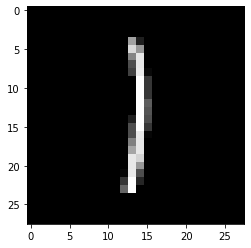

In [85]:
plt.imshow(x_test[40],cmap="gray")
print(y_pred[40])
print(y_pred1[40])

In [86]:
model.save('mnist.h5')

In [87]:
results.history['val_accuracy']

[0.9585999846458435,
 0.9629999995231628,
 0.9724000096321106,
 0.9735000133514404,
 0.9746000170707703,
 0.9743000268936157,
 0.9753999710083008,
 0.9763000011444092,
 0.9761000275611877,
 0.975600004196167]

In [88]:
results.history['accuracy']

[0.9241666793823242,
 0.9623333215713501,
 0.9755833148956299,
 0.9814500212669373,
 0.986383318901062,
 0.9890666604042053,
 0.991683304309845,
 0.9925833344459534,
 0.9933000206947327,
 0.9951833486557007]

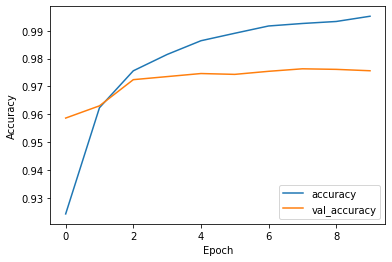

In [89]:
plt.plot(results.history['accuracy'], label='accuracy')
plt.plot(results.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')